In [7]:
import os
import pickle
import logging

import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

from hbmep.config import Config
from hbmep.model.utils import Site as site

from paper.utils import setup_logging
from models import HierarchicalBayesianModel
from core__cc_position_charge import _process_data
from core__cc_position_charge import (
    BUILD_DIR, COMPLETE_CASES
)
from constants import (
    TOML_PATH,
    DATA_PATH,
    INFERENCE_FILE
)

logger = logging.getLogger(__name__)
setup_logging(dir=BUILD_DIR, fname="analysis__cc_position_charge")


2024-07-13 13:02:30,069 - paper.utils.utils - INFO - Logging to /home/vishu/repos/rat-mapping-paper/reports/j-shap/complete_cases_postition_charge/analysis__cc_position_charge.log


In [8]:
src = os.path.join(BUILD_DIR, "inference.pkl")
with open(src, "rb") as f:
    model, mcmc, posterior_samples = pickle.load(f)


In [9]:
a_delta_loc = posterior_samples["a_delta_loc"]
a_delta_loc.shape


(4000, 5, 6)

In [10]:
# df = pd.read_csv(DATA_PATH)
# logger.info("Processing data ...")

# df = _process_data(df=df, keep_combinations=COMPLETE_CASES)
# logger.info(f"Processed df shape: {df.shape}")

# df, encoder_dict = model.load(df=df)

src = os.path.join(BUILD_DIR, "encoder_dict.pkl")
with open(src, "rb") as f:
    df, encoder_dict = pickle.load(f)


In [11]:
conditions = encoder_dict[model.features[1]].inverse_transform(
    sorted(df[model.features[1]].unique())
).tolist()

conditions


['C7L-C7M___01_50-0-50-100',
 'C7L-C7M___02_20-0-80-25',
 'C7L-C7M___03_50-0-50-0',
 'C7M-C7L___01_50-0-50-100',
 'C7M-C7L___02_20-0-80-25',
 'C7M-C7L___03_50-0-50-0']

In [16]:
(a_delta_loc > 0).mean(axis=0)

array([[1.     , 0.999  , 1.     , 0.9995 , 1.     , 1.     ],
       [1.     , 0.997  , 1.     , 1.     , 1.     , 0.9995 ],
       [1.     , 0.9995 , 1.     , 1.     , 0.99675, 1.     ],
       [1.     , 1.     , 1.     , 1.     , 1.     , 0.99975],
       [1.     , 1.     , 1.     , 1.     , 1.     , 1.     ]])

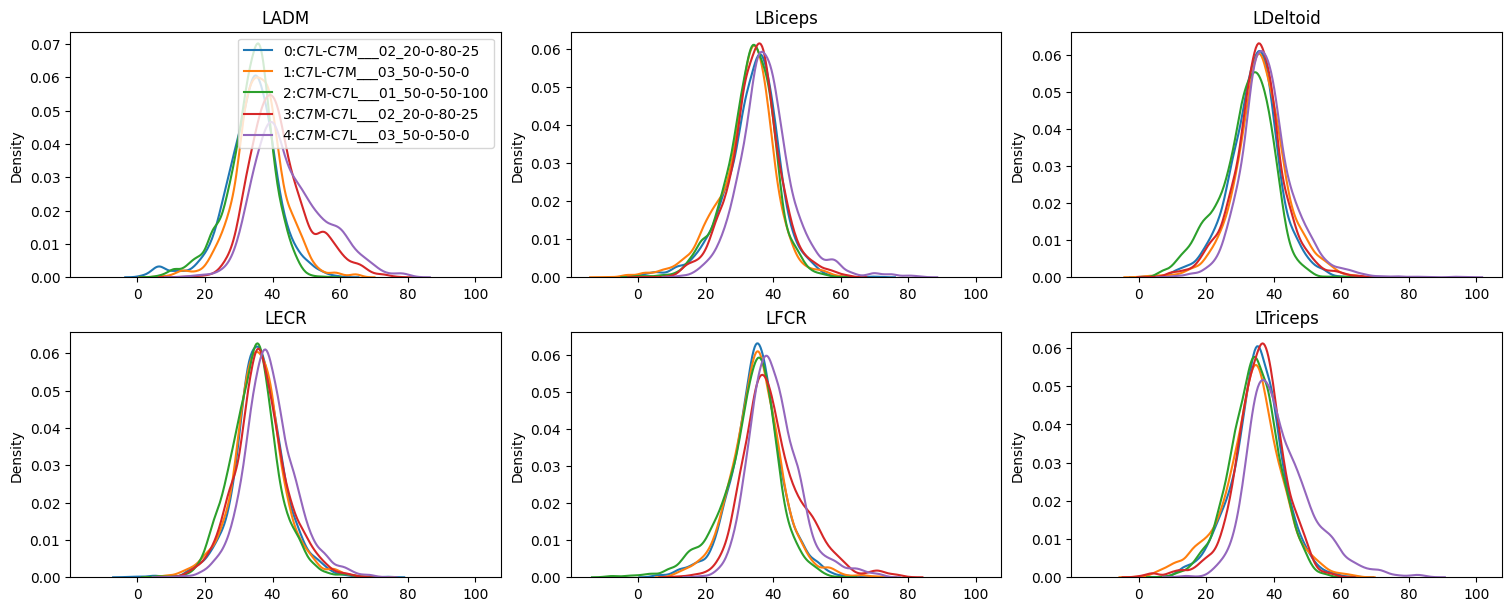

In [13]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * 5, nrows * 3),
    constrained_layout=True,
    squeeze=False,
    sharex=True
)

for j, response in enumerate(model.response):
    ax = axes[j // ncols, j % ncols]
    for i, condition in enumerate(conditions[1:]):
        samples = a_delta_loc[:, i, j]
        sns.kdeplot(samples, ax=ax, label=f"{i}:{condition}")
        ax.set_title(model.response[j])
        ax.tick_params(axis="x", labelbottom=True)

axes[0, 0].legend()


In [20]:
a_delta_loc_loc = posterior_samples["a_delta_loc_loc"]
(a_delta_loc_loc > 0).mean()


1.0

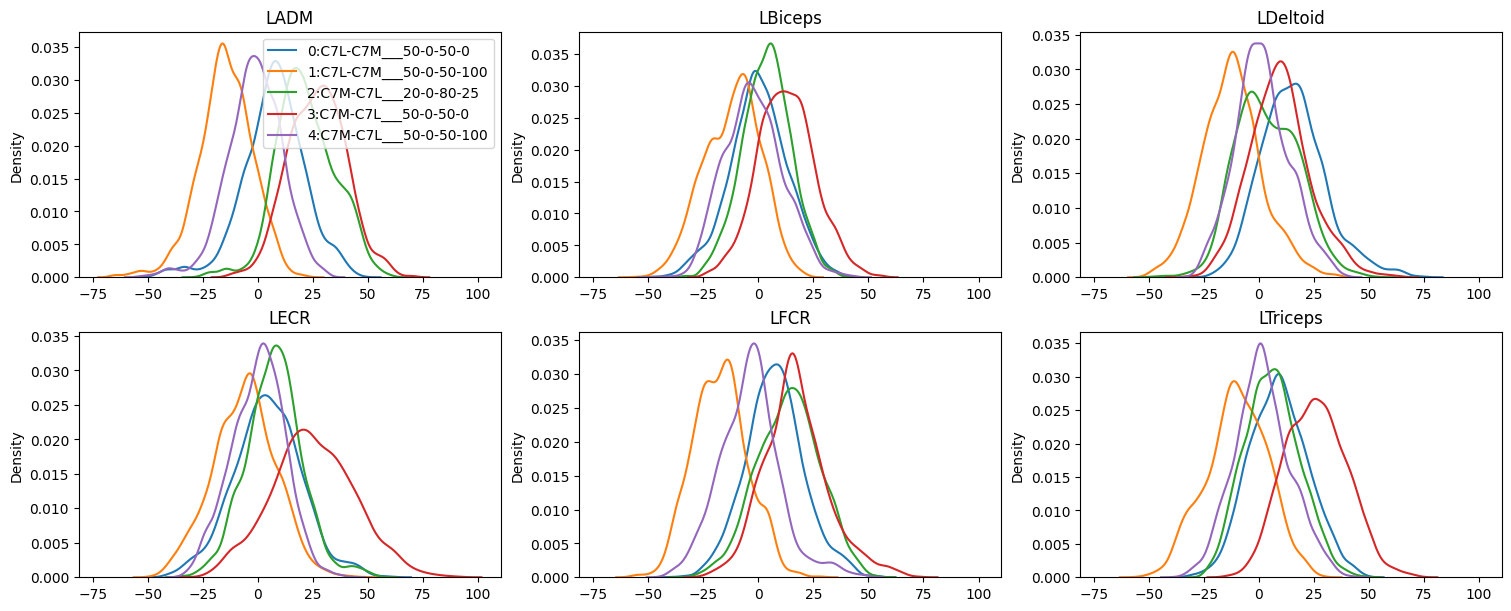

In [6]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * 5, nrows * 3),
    constrained_layout=True,
    squeeze=False,
    sharex=True
)

for j, response in enumerate(model.response):
    ax = axes[j // ncols, j % ncols]
    for i, condition in enumerate(conditions[1:]):
        samples = a_delta_loc[:, i, j]
        sns.kdeplot(samples, ax=ax, label=f"{i}:{condition}")
        ax.set_title(model.response[j])
        ax.tick_params(axis="x", labelbottom=True)

axes[0, 0].legend()


In [7]:
(a_delta_loc[:, 1, :] < a_delta_loc[:, 0, :]).mean(axis=0)

array([0.8695 , 0.7375 , 0.95825, 0.694  , 0.9345 , 0.84475])

In [8]:
l = 1
l_charge = conditions[1:][l]
for r, r_charge in enumerate(conditions[1:]):
    if l_charge == r_charge: continue
    prob = (a_delta_loc[:, l, :] < a_delta_loc[:, r, :]).mean(axis=0).tolist()
    print(f"\n\n{l_charge} < {r_charge}:\n{prob}")





C7L-C7M___50-0-50-100 < C7L-C7M___50-0-50-0:
[0.8695, 0.7375, 0.95825, 0.694, 0.9345, 0.84475]


C7L-C7M___50-0-50-100 < C7M-C7L___20-0-80-25:
[0.983, 0.836, 0.80875, 0.7955, 0.96525, 0.79325]


C7L-C7M___50-0-50-100 < C7M-C7L___50-0-50-0:
[0.99125, 0.93125, 0.925, 0.93725, 0.98375, 0.9765]


C7L-C7M___50-0-50-100 < C7M-C7L___50-0-50-100:
[0.7825, 0.68275, 0.77675, 0.633, 0.80975, 0.71475]


0.93125


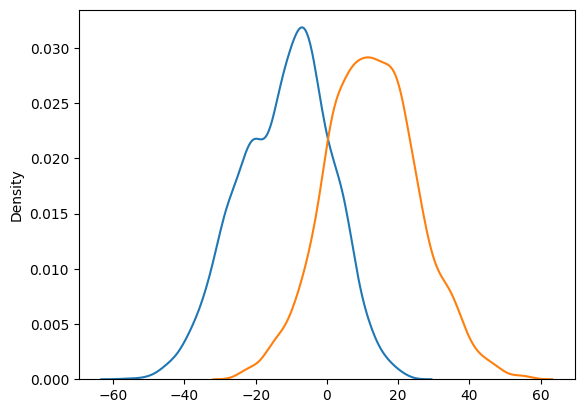

In [9]:
muscle = 1

l_samples = a_delta_loc[:, 1, muscle]
sns.kdeplot(
    l_samples
)
r_samples = a_delta_loc[:, 3, muscle]
sns.kdeplot(
    r_samples
)
print((l_samples < r_samples).mean())

